In [2]:
import pandas as pd

## import data

In [3]:
df = pd.read_excel(r"Dataset_17_feat.xlsx")
X = df.drop(['Experimental_index','DP_Group','Release'],axis='columns')
Y = df['Release']
G = df['DP_Group']
X.head()

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0
0,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,0.000000,0.091248,0.186161,0.350932
1,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,0.260639,0.091248,0.186161,0.350932
2,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,1.059830,0.091248,0.186161,0.350932
3,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,2.089820,0.091248,0.186161,0.350932
4,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,3.113530,0.091248,0.186161,0.350932


# Heirarcical clustering

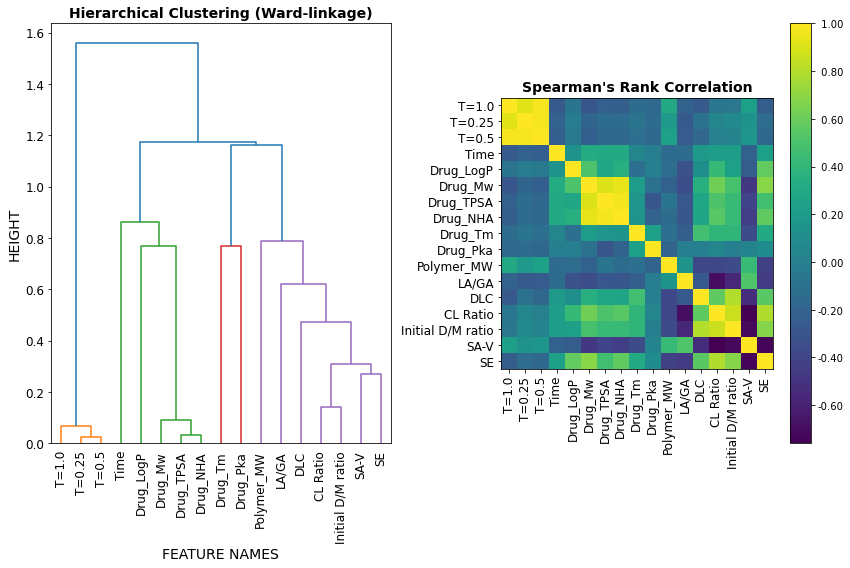

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

corr = spearmanr(X).correlation # generate a correlation matrix is symmetric
corr = (corr + corr.T) / 2 # ensure the correlation matrix is symmetric
np.fill_diagonal(corr, 1)
distance_matrix = 1 - np.abs(corr) # convert the correlation matrix to a distance matrix 
dist_linkage = hierarchy.ward(squareform(distance_matrix)) # generate Ward's linkage values for hierarchical clustering

dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.set_title("Hierarchical Clustering (Ward-linkage)", fontsize=14, color="black", weight="bold")
ax1.set_xlabel('FEATURE NAMES', fontsize=14, color="black")
ax1.set_ylabel('HEIGHT', fontsize=14, color="black")
ax1.tick_params(axis='y', which='both', labelsize=12)
ax1.tick_params(axis='x', which='both', labelsize=12)


im = ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]], 
                alpha = 1.0)
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
ax2.figure.colorbar(im, format='% .2f')
ax2.tick_params(axis='y', which='both', labelsize=12)
ax2.tick_params(axis='x', which='both', labelsize=12)
ax2.set_title("Spearman's Rank Correlation", fontsize=14, color="black", weight="bold")
fig.tight_layout()

#plt.savefig('drive/My Drive/RF_14feature_corr&cluster', dpi=600, format = 'png', transparent=True, bbox_inches='tight')

plt.show()

In [5]:
corr_data = pd.read_excel(r"Dataset_3.0_17_feat.xlsx")
corr_data.head()

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0,Release
0,80,5-FU-PLGA,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,0.000000,0.091248,0.186161,0.350932,0.000000
1,80,5-FU-PLGA,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,0.260639,0.091248,0.186161,0.350932,0.066493
2,80,5-FU-PLGA,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,1.059830,0.091248,0.186161,0.350932,0.402908
3,80,5-FU-PLGA,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,2.089820,0.091248,0.186161,0.350932,0.569291
4,80,5-FU-PLGA,1.0,104000,0.0,282.5,7.76,0.8,0.347,76.726343,0.0,130.078,65.72,5,-0.7977,3.113530,0.091248,0.186161,0.350932,0.685878


In [7]:
corr_X = corr_data.drop(['Experimental_index','DP_Group','Release'],axis='columns')
corr_X.describe()

,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_NHA,Drug_LogP,Time,T=0.25,T=0.5,T=1.0
count,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000
mean,0.804728,35788.243458,0.062898,212.501586,10.706394,0.706403,0.185306,696.890253,0.292556,568.665150,143.050444,9.970130,2.906533,25.282098,0.051518,0.085424,0.136510
std,1.014593,24367.696754,0.067404,66.170200,2.532575,0.626488,0.129191,2298.216586,0.261045,279.754951,85.883087,5.494135,1.534499,33.393552,0.052741,0.081599,0.125631
min,0.000000,8300.000000,0.000000,66.000000,4.400000,0.006200,0.004067,2.484800,0.000000,130.078000,23.470000,2.000000,-2.213100,0.000000,0.001305,0.004012,0.005522
25%,0.000000,15000.000000,0.000000,206.000000,10.360000,0.113560,0.059300,2.888889,0.000000,331.353000,78.290000,6.000000,2.418800,3.286708,0.010860,0.020978,0.040041
50%,1.000000,32000.000000,0.040000,216.500000,10.360000,0.833333,0.176000,65.934066,0.500000,434.504000,99.600000,8.000000,3.735700,14.000000,0.042121,0.073216,0.113809
75%,1.000000,44000.000000,0.150000,262.000000,11.750000,1.000000,0.312800,155.561317,0.500000,853.918000,221.290000,15.000000,3.735700,32.000000,0.069454,0.118435,0.182187
max,3.000000,108000.000000,0.180000,312.500000,19.690000,2.500000,0.619000,22018.348624,1.000000,1269.473000,466.340000,30.000000,5.846500,190.000000,0.314926,0.488596,0.718447


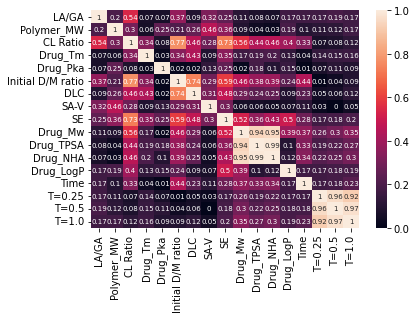

In [8]:
correlations = corr_X.corr()
sns.heatmap(round(np.abs(correlations),2), annot=True, 
            annot_kws={"size": 7}, vmin=0, vmax=1);

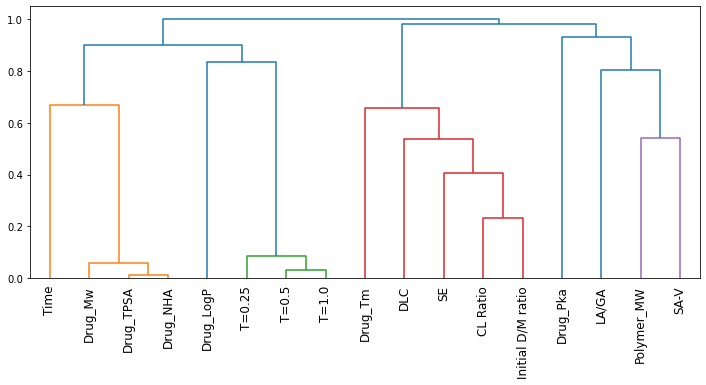

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=corr_X.columns, orientation='top', 
           leaf_rotation=90);

In [10]:
# Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([6, 5, 4, 4, 7, 4, 4, 5, 4, 1, 1, 1, 3, 1, 2, 2, 2], dtype=int32)

In [11]:
import numpy as np

# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(corr_X.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(corr_X[i])
    else:
        df_to_append = pd.DataFrame(corr_X[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

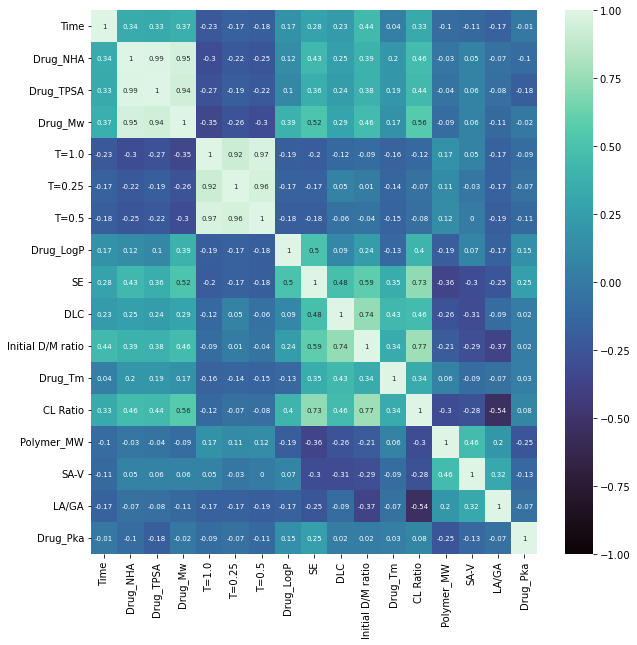

In [12]:
# Colors - cmap="mako", cmap="viridis", cmap="Blues", cmap='RdBu'

plt.figure(figsize=(10,10))
correlations = clustered.corr()
plot = sns.heatmap(round(correlations,2), cmap='mako', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

#plot.tick_params(axis='y', which='both', labelsize=12)
#plot.tick_params(axis='x', which='both', labelsize=12)
#plot.set_title("Spearman's Rank Correlation", fontsize=14, color="black", weight="bold")

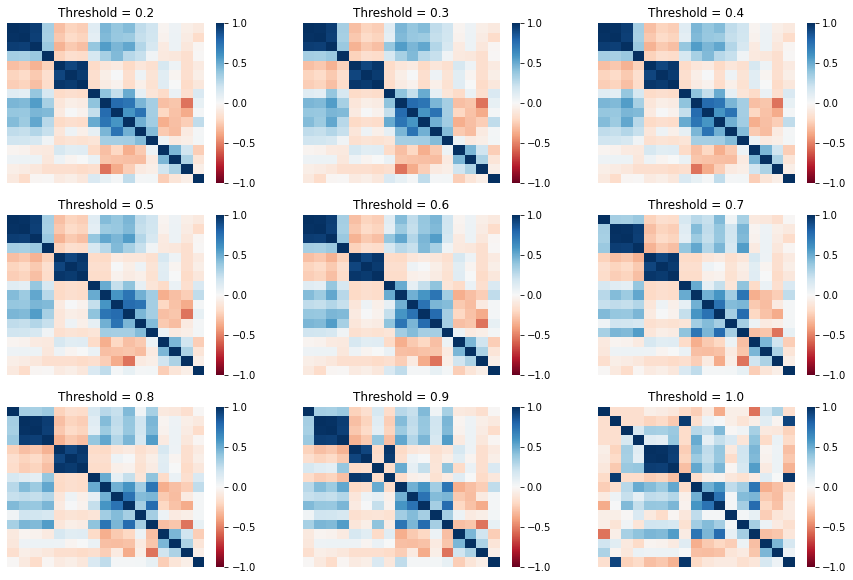

In [13]:
plt.figure(figsize=(15,10))

for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(corr_X.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(corr_X[i])
        else:
            df_to_append = pd.DataFrame(corr_X[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))

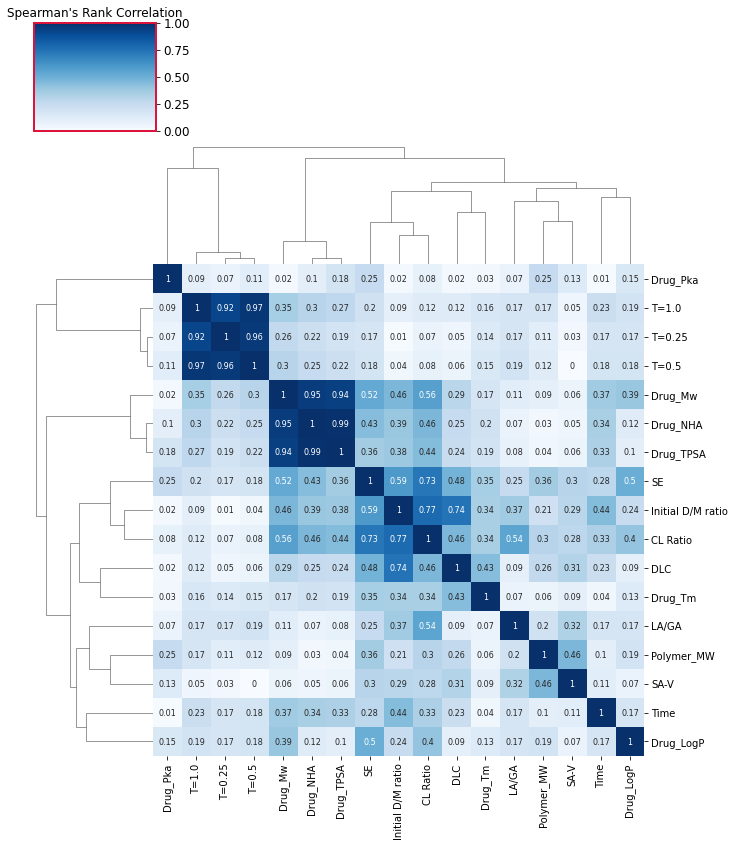

In [43]:
my_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
         'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
         'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
         'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
         'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
         'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
         'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
         'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 
         'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 
         'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 
         'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
         'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
         'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']

# Colors - cmap="mako", cmap="viridis", cmap="Blues", cmap='RdBu', rocket, flare, "seagreen", Reds, Magma
#for color in my_list:
#kws = dict(cbar_kws=dict(ticks=[0, 0.50, 1], orientation='horizontal'), figsize=(6, 6))

g = sns.clustermap(round(np.abs(correlations),2), method="complete", cmap=my_list[2], annot=True, 
               annot_kws={"size": 8}, vmin=0, vmax=1, figsize=(10,10));

x0, _y0, _w, _h = g.cbar_pos

g.ax_cbar.set_position([x0, 1.0, g.ax_row_dendrogram.get_position().width, 0.15])
g.ax_cbar.set_title("Spearman's Rank Correlation")
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('crimson')
    g.ax_cbar.spines[spine].set_linewidth(2)

plt.tick_params(axis='y', which='both', labelsize=12)
plt.tick_params(axis='x', which='both', labelsize=12)

#plt.tight_layout()
plt.savefig('Figures/Figure_2/Heapmap.png', dpi=600, format = 'png', transparent=True, bbox_inches='tight')

plt.show()